# Data Wrangling

## Preparación de ambiente

### Carga de módulos

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf

cf.go_offline()

### Funciones relevantes

In [2]:
def freq_discrete(df, features):
    for feature in features:
        print(f"Feature: {feature}")
        abs_ = df[feature].value_counts(dropna=False).to_frame().rename(columns={feature: "Absolute frequency"})
        rel_ = df[feature].value_counts(dropna=False, normalize= True).to_frame().rename(columns={feature: "Relative frequency"})
        freq = abs_.join(rel_)
        freq["Accumulated frequency"] = freq["Absolute frequency"].cumsum()
        freq["Accumulated %"] = freq["Relative frequency"].cumsum()
        freq["Absolute frequency"] = freq["Absolute frequency"].map(lambda x: "{:,.0f}".format(x))
        freq["Relative frequency"] = freq["Relative frequency"].map(lambda x: "{:,.2%}".format(x))
        freq["Accumulated frequency"] = freq["Accumulated frequency"].map(lambda x: "{:,.0f}".format(x))
        freq["Accumulated %"] = freq["Accumulated %"].map(lambda x: "{:,.2%}".format(x))
        display(freq)

In [3]:
def normalize(df, features):
    for feature in features:
        aux = df[feature].value_counts(True)
        ls_categories = [category for category, freq in aux.items() if freq > 0.05]
        df[feature] = df[feature].map(lambda x: x if x in ls_categories else "Others")
    return df

In [4]:
def remove_extrema(df, features):
    n = df.shape[0]
    for feature in features:
        q3 = df[feature].quantile(0.75)
        q1 = df[feature].quantile(0.25)
        iqr = q3 - q1
        df = df[df[feature].between(q1-1.5*iqr, q3+1.5*iqr)].reset_index(drop=True)
    print(df.shape[0]/n)
    return df

## Data Wrangling

### Lectura de datos

In [7]:
df = pd.read_csv("movies.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'movies.csv'

In [6]:
df.loc[df["movie_title"].str.contains("Avatar"), :]

NameError: name 'df' is not defined

In [6]:
df

,movie_title,movie_imdb_link,color,genre_4,duration,gross,genre_1,genre_2,genre_3,num_voted_users,facenumber_in_poster,language,country,content_rating,title_year,imdb_score
0,Femme Fatale,http://www.imdb.com/title/tt0280665/?ref_=fn_t...,Color,Thriller,114.0,NaN,Crime,Drama,Mystery,28584,1,English,France,R,2002.0,6.3
1,An Unfinished Life,http://www.imdb.com/title/tt0350261/?ref_=fn_t...,Color,NaN,108.0,NaN,Drama,NaN,NaN,24033,3,English,USA,PG-13,2005.0,7.0
2,C.H.U.D.,http://www.imdb.com/title/tt0087015/?ref_=fn_t...,Color,NaN,96.0,NaN,Horror,Sci-Fi,NaN,7528,0,English,USA,R,1984.0,5.5
3,Just Wright,http://www.imdb.com/title/tt1407061/?ref_=fn_t...,Color,NaN,100.0,21520719.0,Comedy,Romance,Sport,10103,1,English,USA,PG,2010.0,5.8
4,Yentl,http://www.imdb.com/title/tt0086619/?ref_=fn_t...,Color,NaN,132.0,30400000.0,Drama,Musical,Romance,9503,1,English,UK,PG,1983.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,The O.C.,http://www.imdb.com/title/tt0362359/?ref_=fn_t...,Color,NaN,44.0,NaN,Comedy,Drama,Romance,65785,8,English,USA,TV-PG,NaN,7.5
5039,The Book of Eli,http://www.imdb.com/title/tt1037705/?ref_=fn_t...,Color,Thriller,118.0,NaN,Action,Adventure,Drama,227072,0,English,USA,R,2010.0,6.9
5040,Punisher: War Zone,http://www.imdb.com/title/tt0450314/?ref_=fn_t...,Color,Thriller,103.0,NaN,Action,Crime,Drama,48999,1,English,USA,R,2008.0,6.0
5041,Step Up 2: The Streets,http://www.imdb.com/title/tt1023481/?ref_=fn_t...,Color,Romance,98.0,NaN,Drama,Music,Musical,67653,2,English,USA,PG-13,2008.0,6.2


In [7]:
df["color"].value_counts(True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [8]:
df[df["imdb_score"]>10]

,movie_title,movie_imdb_link,color,genre_4,duration,gross,genre_1,genre_2,genre_3,num_voted_users,facenumber_in_poster,language,country,content_rating,title_year,imdb_score
3319,Sanctuary,nudity|party|pirate|swimsuit|three word title,Color,NaN,82.0,NaN,Comedy,Horror,Thriller,Quite a Conundrum,John Lucas,8,English,USA,200000.0,98.0


### EDA

In [9]:
df.sample(5)

,movie_title,movie_imdb_link,color,genre_4,duration,gross,genre_1,genre_2,genre_3,num_voted_users,facenumber_in_poster,language,country,content_rating,title_year,imdb_score
2821,Fame,http://www.imdb.com/title/tt1016075/?ref_=fn_t...,Color,Romance,123.0,NaN,Comedy,Drama,Musical,14062,0,English,USA,PG,2009.0,5.0
1230,A Guy Named Joe,http://www.imdb.com/title/tt0035959/?ref_=fn_t...,Black and White,War,122.0,NaN,Drama,Fantasy,Romance,1553,0,English,USA,Passed,1943.0,7.0
2275,Everest,http://www.imdb.com/title/tt2719848/?ref_=fn_t...,Color,History,121.0,NaN,Adventure,Biography,Drama,134625,0,English,UK,PG-13,2015.0,7.1
1434,Cursed,http://www.imdb.com/title/tt0257516/?ref_=fn_t...,Color,NaN,99.0,19294901.0,Comedy,Horror,NaN,26126,0,English,USA,PG-13,2005.0,5.0
1362,The Scorpion King,http://www.imdb.com/title/tt0277296/?ref_=fn_t...,Color,Thriller,100.0,NaN,Action,Adventure,Fantasy,102129,4,English,USA,PG-13,2002.0,5.5


In [25]:
df = df[df["imdb_score"] <= 10].reset_index()

#### Clasificación de variables

In [10]:
ls_id = ["movie_title", "movie_imdb_link"]
ls_cont = ["duration", "gross", "num_voted_users", "facenumber_in_poster", "title_year"]
ls_disc = ["color", "genre_4", "genre_1", "genre_2", "genre_3", "language", "country", "content_rating"]
target = "imdb_score"

#### Análisis discreto

In [11]:
freq_discrete(df, ls_disc)

Feature: color


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
Color,"4,815",95.48%,"4,815",95.48%
Black and White,209,4.14%,"5,024",99.62%
NaN,19,0.38%,"5,043",100.00%


Feature: genre_4


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
NaN,"3,616",71.70%,"3,616",71.70%
Thriller,481,9.54%,"4,097",81.24%
Romance,182,3.61%,"4,279",84.85%
Family,136,2.70%,"4,415",87.55%
Sci-Fi,120,2.38%,"4,535",89.93%
Fantasy,104,2.06%,"4,639",91.99%
Mystery,71,1.41%,"4,710",93.40%
War,64,1.27%,"4,774",94.67%
Drama,50,0.99%,"4,824",95.66%
Sport,44,0.87%,"4,868",96.53%


Feature: genre_1


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
Comedy,"1,329",26.35%,"1,329",26.35%
Action,"1,153",22.86%,"2,482",49.22%
Drama,972,19.27%,"3,454",68.49%
Adventure,453,8.98%,"3,907",77.47%
Crime,349,6.92%,"4,256",84.39%
Biography,252,5.00%,"4,508",89.39%
Horror,232,4.60%,"4,740",93.99%
Documentary,84,1.67%,"4,824",95.66%
Animation,61,1.21%,"4,885",96.87%
Fantasy,53,1.05%,"4,938",97.92%


Feature: genre_2


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
Drama,"1,204",23.87%,"1,204",23.87%
NaN,633,12.55%,"1,837",36.43%
Adventure,470,9.32%,"2,307",45.75%
Crime,410,8.13%,"2,717",53.88%
Romance,390,7.73%,"3,107",61.61%
Comedy,341,6.76%,"3,448",68.37%
Horror,214,4.24%,"3,662",72.62%
Thriller,207,4.10%,"3,869",76.72%
Mystery,205,4.07%,"4,074",80.79%
Family,181,3.59%,"4,255",84.37%


Feature: genre_3


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
NaN,"1,988",39.42%,"1,988",39.42%
Thriller,539,10.69%,"2,527",50.11%
Romance,468,9.28%,"2,995",59.39%
Drama,365,7.24%,"3,360",66.63%
Sci-Fi,275,5.45%,"3,635",72.08%
Fantasy,216,4.28%,"3,851",76.36%
Family,183,3.63%,"4,034",79.99%
Comedy,180,3.57%,"4,214",83.56%
Mystery,172,3.41%,"4,386",86.97%
Crime,116,2.30%,"4,502",89.27%


Feature: language


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
English,"4,703",93.26%,"4,703",93.26%
French,73,1.45%,"4,776",94.71%
Spanish,40,0.79%,"4,816",95.50%
Hindi,28,0.56%,"4,844",96.05%
Mandarin,26,0.52%,"4,870",96.57%
German,19,0.38%,"4,889",96.95%
Japanese,18,0.36%,"4,907",97.30%
NaN,12,0.24%,"4,919",97.54%
Russian,11,0.22%,"4,930",97.76%
Italian,11,0.22%,"4,941",97.98%


Feature: country


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
USA,"3,806",75.47%,"3,806",75.47%
UK,448,8.88%,"4,254",84.35%
France,154,3.05%,"4,408",87.41%
Canada,126,2.50%,"4,534",89.91%
Germany,97,1.92%,"4,631",91.83%
...,...,...,...,...
Panama,1,0.02%,"5,039",99.92%
Chile,1,0.02%,"5,040",99.94%
Kyrgyzstan,1,0.02%,"5,041",99.96%
Bahamas,1,0.02%,"5,042",99.98%


Feature: content_rating


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
R,"2,118",42.00%,"2,118",42.00%
PG-13,"1,461",28.97%,"3,579",70.97%
PG,701,13.90%,"4,280",84.87%
NaN,302,5.99%,"4,582",90.86%
Not Rated,116,2.30%,"4,698",93.16%
G,112,2.22%,"4,810",95.38%
Unrated,62,1.23%,"4,872",96.61%
Approved,55,1.09%,"4,927",97.70%
TV-14,30,0.59%,"4,957",98.29%
TV-MA,20,0.40%,"4,977",98.69%


#### Remoción de variables altamente vacías

In [12]:
aux = df.isna().mean()

In [13]:
ls_drop = [feature for feature, frequency in aux.items() if frequency > 0.3]

In [14]:
ls_disc = [x for x in ls_disc if x not in ls_drop]
ls_cont = [x for x in ls_cont if x not in ls_drop]

#### Normalizado

In [15]:
df = normalize(df, ls_disc)

In [16]:
freq_discrete(df, ls_disc)

Feature: color


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
Color,"4,815",95.48%,"4,815",95.48%
Others,228,4.52%,"5,043",100.00%


Feature: genre_1


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
Comedy,"1,329",26.35%,"1,329",26.35%
Action,"1,153",22.86%,"2,482",49.22%
Drama,972,19.27%,"3,454",68.49%
Others,787,15.61%,"4,241",84.10%
Adventure,453,8.98%,"4,694",93.08%
Crime,349,6.92%,"5,043",100.00%


Feature: genre_2


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
Others,"2,228",44.18%,"2,228",44.18%
Drama,"1,204",23.87%,"3,432",68.05%
Adventure,470,9.32%,"3,902",77.37%
Crime,410,8.13%,"4,312",85.50%
Romance,390,7.73%,"4,702",93.24%
Comedy,341,6.76%,"5,043",100.00%


Feature: language


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
English,"4,703",93.26%,"4,703",93.26%
Others,340,6.74%,"5,043",100.00%


Feature: country


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
USA,"3,806",75.47%,"3,806",75.47%
Others,789,15.65%,"4,595",91.12%
UK,448,8.88%,"5,043",100.00%


Feature: content_rating


,Absolute frequency,Relative frequency,Accumulated frequency,Accumulated %
R,"2,118",42.00%,"2,118",42.00%
PG-13,"1,461",28.97%,"3,579",70.97%
Others,763,15.13%,"4,342",86.10%
PG,701,13.90%,"5,043",100.00%


#### Análisis continuo

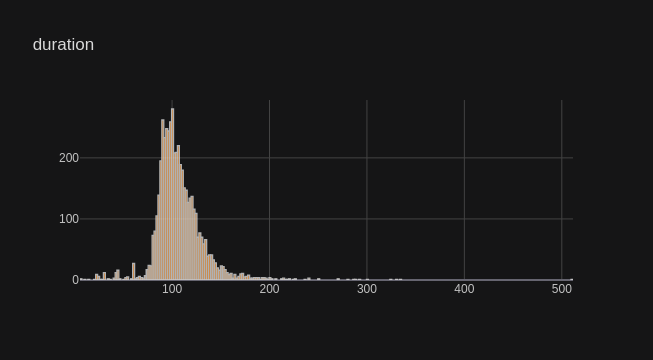

None

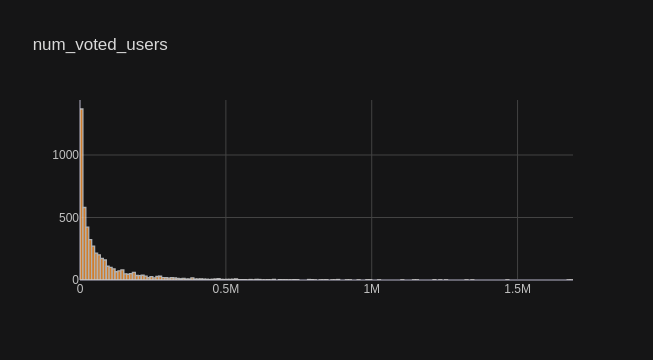

None

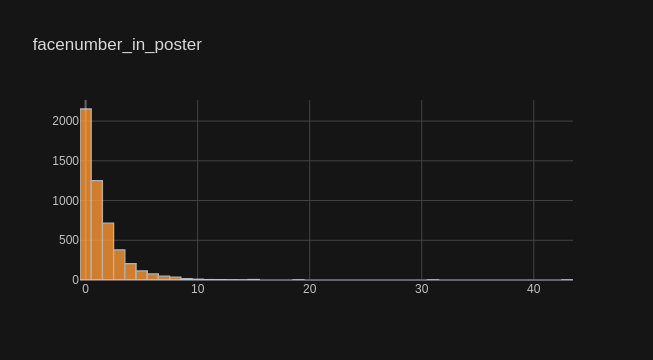

None

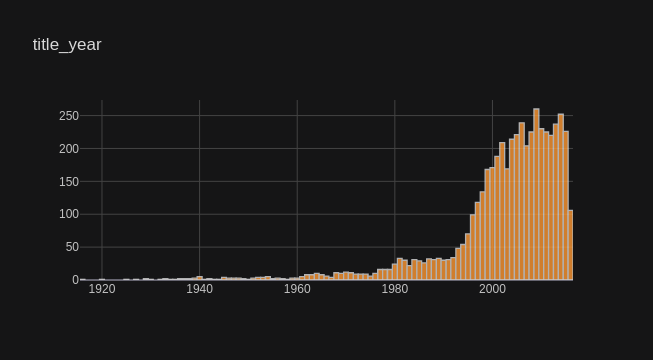

None

In [26]:
for feature in ls_cont:
    df[feature] = df[feature].astype(float)
    display(df[feature].iplot(kind="hist", theme="solar", title=feature))

#### Remoción de outliers

In [33]:
df = remove_extrema(df, ls_cont)

duration
num_voted_users
facenumber_in_poster
title_year
0.7631892106307021


#### Variables Dummy

In [35]:
tad = df[ls_cont].join(pd.get_dummies(df[ls_disc]))

In [37]:
ls_unarias = [feature for feature, frequency in tad.nunique().items() if frequency == 1]

In [38]:
ls_unarias

[]

In [39]:
tad = tad[[x for x in tad.columns if x not in ls_unarias]]

In [40]:
tad

,duration,num_voted_users,facenumber_in_poster,title_year,color_Color,color_Others,genre_1_Action,genre_1_Adventure,genre_1_Comedy,genre_1_Crime,...,genre_2_Romance,language_English,language_Others,country_Others,country_UK,country_USA,content_rating_Others,content_rating_PG,content_rating_PG-13,content_rating_R
0,114.0,28584.0,1.0,2002.0,1,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,108.0,24033.0,3.0,2005.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,96.0,7528.0,0.0,1984.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,100.0,10103.0,1.0,2010.0,1,0,0,0,1,0,...,1,1,0,0,0,1,0,1,0,0
4,132.0,9503.0,1.0,1983.0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,118.0,14143.0,4.0,2006.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3844,109.0,5971.0,1.0,2002.0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3845,103.0,48999.0,1.0,2008.0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3846,98.0,67653.0,2.0,2008.0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
